In [2]:
%run ./ml_model_init.ipynb

## Baseline Model


In [3]:
# Split the gk data into train and test sets
def_splits = split_data(def_player_data)

#### Linear Model


In [4]:

base_def_lin_reg = Linear_regression(def_splits['feature_train'], def_splits['features_test'],
                               def_splits['target_train'], def_splits['target_test'])

# Store the model evaluation details in a DataFrame
def_evaluation_stats = pd.DataFrame({"base_def_lin_reg": [base_def_lin_reg['train_RMSE'], base_def_lin_reg['test_RMSE'], base_def_lin_reg['cv_rmse'], base_def_lin_reg['R2_train'], base_def_lin_reg['R2_test']]},
                                                        index=(['train_RMSE', 'test_RMSE', 'cv_rmse', 'R2_train', 'R2_test']))

def_evaluation_stats

Training set RMSE: 1.00035762054337
Test set RMSE: 0.997658160887871
Training set R2: 0.8435209933799608
Test set R2: 0.8427534690252555
count    10.000000
mean      1.006002
std       0.036986
min       0.945045
25%       0.977327
50%       1.003016
75%       1.036862
max       1.056835
dtype: float64


,base_def_lin_reg
train_RMSE,1.000358
test_RMSE,0.997658
cv_rmse,1.006002
R2_train,0.843521
R2_test,0.842753


#### DecisionTree Model


In [5]:
base_def_dt_reg = DecisionTreeRegression(def_splits['feature_train'], def_splits['features_test'],
                               def_splits['target_train'], def_splits['target_test'])

# Store the model evaluation details in a DataFrame
def_evaluation_stats = def_evaluation_stats.assign(base_def_dt_reg = [base_def_dt_reg['train_RMSE'], base_def_dt_reg['test_RMSE'], base_def_dt_reg['cv_rmse'], base_def_dt_reg['R2_train'], base_def_dt_reg['R2_test']])

def_evaluation_stats



Training set RMSE: 4.670847498124149e-15
Test set RMSE: 1.32743300984435
Training set R2: 1.0
Test set R2: 0.7216169550882567
count    10.000000
mean      1.318856
std       0.138730
min       1.020295
25%       1.275286
50%       1.328574
75%       1.412552
max       1.502661
dtype: float64


,base_def_lin_reg,base_def_dt_reg
train_RMSE,1.000358,4.670847e-15
test_RMSE,0.997658,1.327433e+00
cv_rmse,1.006002,1.318856e+00
R2_train,0.843521,1.000000e+00
R2_test,0.842753,7.216170e-01


#### RandomForest Model


In [6]:
hyperparameters = {"criterion": 'friedman_mse', "max_depth": 8, "max_features": 'sqrt', "n_estimators": 20}
base_def_rf_reg = RandomForestRegression(def_splits['feature_train'], def_splits['features_test'],
                               def_splits['target_train'], def_splits['target_test'], hyperparameters)

# Store the model evaluation details in a DataFrame
def_evaluation_stats = def_evaluation_stats.assign(base_def_rf_reg = [base_def_rf_reg['train_RMSE'], base_def_rf_reg['test_RMSE'], base_def_rf_reg['cv_rmse'], base_def_rf_reg['R2_train'], base_def_rf_reg['R2_test']])

def_evaluation_stats

count    10.000000
mean      0.985390
std       0.063889
min       0.865670
25%       0.946364
50%       0.986157
75%       1.032658
max       1.074983
dtype: float64


,base_def_lin_reg,base_def_dt_reg,base_def_rf_reg
train_RMSE,1.000358,4.670847e-15,0.679617
test_RMSE,0.997658,1.327433e+00,0.910994
cv_rmse,1.006002,1.318856e+00,0.985390
R2_train,0.843521,1.000000e+00,0.927777
R2_test,0.842753,7.216170e-01,0.868886


#### XgBoost Model


In [7]:
hyperparameters = {'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 150}
base_def_xgb_reg = XGBoostRegression(def_splits['feature_train'], def_splits['features_test'], def_splits['target_train'], def_splits['target_test'], hyperparameters)

# Store the model evaluation details in a DataFrame
def_evaluation_stats = def_evaluation_stats.assign(base_def_xgb_reg = [base_def_xgb_reg['train_RMSE'], base_def_xgb_reg['test_RMSE'], base_def_xgb_reg['cv_rmse'], base_def_xgb_reg['R2_train'], base_def_xgb_reg['R2_test']])
def_evaluation_stats

,base_def_lin_reg,base_def_dt_reg,base_def_rf_reg,base_def_xgb_reg
train_RMSE,1.000358,4.670847e-15,0.679617,0.868038
test_RMSE,0.997658,1.327433e+00,0.910994,0.967450
cv_rmse,1.006002,1.318856e+00,0.985390,0.993612
R2_train,0.843521,1.000000e+00,0.927777,0.882179
R2_test,0.842753,7.216170e-01,0.868886,0.852132


# Feature engineering


### VarianceThreshold


In [8]:
VT_scaler = StandardScaler()
df_def_train_scaled = pd.DataFrame(VT_scaler.fit_transform(def_splits['feature_train']), columns=def_splits['feature_train'].columns)
df_def_test_scaled = pd.DataFrame(VT_scaler.transform(def_splits['features_test']), columns=def_splits['features_test'].columns)

selector = VarianceThreshold(threshold = 0.1)
selector.fit_transform(df_def_train_scaled)

def_threshold_columns = df_def_train_scaled.columns[selector.get_support()]

def_threshold_train = df_def_train_scaled[def_threshold_columns]
def_threshold_test = df_def_test_scaled[def_threshold_columns]

def_threshold_train.shape, def_threshold_test.shape

((4385, 20), (1097, 20))

#### Model(VT)


##### Linear Model


In [9]:

VarT_def_lin_reg = Linear_regression(def_threshold_train, def_threshold_test,
                               def_splits['target_train'], def_splits['target_test'])

# Store the model evaluation details in a DataFrame
def_evaluation_stats = def_evaluation_stats.assign(VarT_def_lin_reg =  [VarT_def_lin_reg['train_RMSE'], VarT_def_lin_reg['test_RMSE'], VarT_def_lin_reg['cv_rmse'], VarT_def_lin_reg['R2_train'], VarT_def_lin_reg['R2_test']])

def_evaluation_stats

Training set RMSE: 1.00035762054337
Test set RMSE: 0.9976581608878834
Training set R2: 0.8435209933799608
Test set R2: 0.8427534690252516
count    10.000000
mean      1.006002
std       0.036986
min       0.945045
25%       0.977327
50%       1.003016
75%       1.036862
max       1.056835
dtype: float64


,base_def_lin_reg,base_def_dt_reg,base_def_rf_reg,base_def_xgb_reg,VarT_def_lin_reg
train_RMSE,1.000358,4.670847e-15,0.679617,0.868038,1.000358
test_RMSE,0.997658,1.327433e+00,0.910994,0.967450,0.997658
cv_rmse,1.006002,1.318856e+00,0.985390,0.993612,1.006002
R2_train,0.843521,1.000000e+00,0.927777,0.882179,0.843521
R2_test,0.842753,7.216170e-01,0.868886,0.852132,0.842753


##### DecisionTree Model


In [10]:
VarT_def_dt_reg = DecisionTreeRegression(def_threshold_train, def_threshold_test,
                               def_splits['target_train'], def_splits['target_test'])

# Store the model evaluation details in a DataFrame
def_evaluation_stats = def_evaluation_stats.assign(VarT_def_dt_reg = [VarT_def_dt_reg['train_RMSE'], VarT_def_dt_reg['test_RMSE'], VarT_def_dt_reg['cv_rmse'], VarT_def_dt_reg['R2_train'], VarT_def_dt_reg['R2_test']])

def_evaluation_stats



Training set RMSE: 4.6669871346952925e-15
Test set RMSE: 1.3461854003734661
Training set R2: 1.0
Test set R2: 0.7136960717617458


count    10.000000
mean      1.345366
std       0.156911
min       1.024751
25%       1.268246
50%       1.332789
75%       1.478043
max       1.536467
dtype: float64


,base_def_lin_reg,base_def_dt_reg,base_def_rf_reg,base_def_xgb_reg,VarT_def_lin_reg,VarT_def_dt_reg
train_RMSE,1.000358,4.670847e-15,0.679617,0.868038,1.000358,4.666987e-15
test_RMSE,0.997658,1.327433e+00,0.910994,0.967450,0.997658,1.346185e+00
cv_rmse,1.006002,1.318856e+00,0.985390,0.993612,1.006002,1.345366e+00
R2_train,0.843521,1.000000e+00,0.927777,0.882179,0.843521,1.000000e+00
R2_test,0.842753,7.216170e-01,0.868886,0.852132,0.842753,7.136961e-01


##### RandomForest Model


In [11]:
hyperparameters = {"criterion": 'friedman_mse', "max_depth": 8, "max_features": 'sqrt', "n_estimators": 20}
VarT_def_rf_reg = RandomForestRegression(def_threshold_train, def_threshold_test,
                               def_splits['target_train'], def_splits['target_test'], hyperparameters)

# Store the model evaluation details in a DataFrame
def_evaluation_stats = def_evaluation_stats.assign(VarT_def_rf_reg = [VarT_def_rf_reg['train_RMSE'], VarT_def_rf_reg['test_RMSE'], VarT_def_rf_reg['cv_rmse'], VarT_def_rf_reg['R2_train'], VarT_def_rf_reg['R2_test']])

def_evaluation_stats

count    10.000000
mean      0.984808
std       0.063080
min       0.865946
25%       0.945854
50%       0.984950
75%       1.033018
max       1.075644
dtype: float64


,base_def_lin_reg,base_def_dt_reg,base_def_rf_reg,base_def_xgb_reg,VarT_def_lin_reg,VarT_def_dt_reg,VarT_def_rf_reg
train_RMSE,1.000358,4.670847e-15,0.679617,0.868038,1.000358,4.666987e-15,0.680037
test_RMSE,0.997658,1.327433e+00,0.910994,0.967450,0.997658,1.346185e+00,0.912053
cv_rmse,1.006002,1.318856e+00,0.985390,0.993612,1.006002,1.345366e+00,0.984808
R2_train,0.843521,1.000000e+00,0.927777,0.882179,0.843521,1.000000e+00,0.927688
R2_test,0.842753,7.216170e-01,0.868886,0.852132,0.842753,7.136961e-01,0.868581


##### XgBoost Model


In [12]:
hyperparameters = {'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 150}
VarT_def_xgb_reg = XGBoostRegression(def_threshold_train, def_threshold_test, def_splits['target_train'], def_splits['target_test'], hyperparameters)

# Store the model evaluation details in a DataFrame
def_evaluation_stats = def_evaluation_stats.assign(VarT_def_xgb_reg = [VarT_def_xgb_reg['train_RMSE'], VarT_def_xgb_reg['test_RMSE'], VarT_def_xgb_reg['cv_rmse'], VarT_def_xgb_reg['R2_train'], VarT_def_xgb_reg['R2_test']])
def_evaluation_stats

,base_def_lin_reg,base_def_dt_reg,base_def_rf_reg,base_def_xgb_reg,VarT_def_lin_reg,VarT_def_dt_reg,VarT_def_rf_reg,VarT_def_xgb_reg
train_RMSE,1.000358,4.670847e-15,0.679617,0.868038,1.000358,4.666987e-15,0.680037,0.868038
test_RMSE,0.997658,1.327433e+00,0.910994,0.967450,0.997658,1.346185e+00,0.912053,0.967450
cv_rmse,1.006002,1.318856e+00,0.985390,0.993612,1.006002,1.345366e+00,0.984808,0.993612
R2_train,0.843521,1.000000e+00,0.927777,0.882179,0.843521,1.000000e+00,0.927688,0.882179
R2_test,0.842753,7.216170e-01,0.868886,0.852132,0.842753,7.136961e-01,0.868581,0.852132


### Feature selection techniques


#### K-best features


In [13]:

from sklearn.feature_selection import SelectKBest, mutual_info_regression

k_rf_model = RandomForestRegressor(n_estimators=20,  max_depth=8, criterion='friedman_mse', max_features='sqrt', random_state=18)

score_list  = []

for k in range(1, def_splits['features_test'].shape[1]):
  selector = SelectKBest(mutual_info_regression, k=k)
  k_sel_X_train =  selector.fit_transform(def_threshold_train, def_splits['target_train'])

  k_rf_model.fit(k_sel_X_train, def_splits['target_train'])

  k_sel_cols = def_threshold_train.columns[selector.get_support()]
  k_sel_X_test = def_threshold_test[k_sel_cols]
  score = round(k_rf_model.score(k_sel_X_test.values, def_splits['target_test'] ), 3)

  score_list.append(score)
print(score_list, score_list.index(max(score_list)))
num_of_feat = score_list.index(max(score_list)) # find the highest score. We will use  that as the value of k

[0.612, 0.755, 0.779, 0.789, 0.789, 0.795, 0.804, 0.799, 0.813, 0.821, 0.816, 0.833, 0.819, 0.814, 0.813, 0.823, 0.839, 0.838, 0.839] 16


In [14]:
selector = SelectKBest(mutual_info_regression, k=num_of_feat+1)
selector.fit_transform(def_threshold_train, def_splits['target_train'])

sel_feats = selector.get_feature_names_out()
k_sel_X_train = def_threshold_train[sel_feats]
k_sel_X_test = def_threshold_test[sel_feats]

##### Model (KBest)


###### Linear Model


In [15]:

KBest_def_lin_reg = Linear_regression(k_sel_X_train, k_sel_X_test,
                               def_splits['target_train'], def_splits['target_test'])

# Store the model evaluation details in a DataFrame
def_evaluation_stats = def_evaluation_stats.assign(KBest_def_lin_reg =  [KBest_def_lin_reg['train_RMSE'], KBest_def_lin_reg['test_RMSE'], KBest_def_lin_reg['cv_rmse'], KBest_def_lin_reg['R2_train'], KBest_def_lin_reg['R2_test']])

def_evaluation_stats

Training set RMSE: 1.0031134140619824
Test set RMSE: 0.9974466064691335
Training set R2: 0.8426576665198862
Test set R2: 0.8428201505253874
count    10.000000
mean      1.007968
std       0.038816
min       0.939128
25%       0.978765
50%       1.009838
75%       1.041358
max       1.057036
dtype: float64


,base_def_lin_reg,base_def_dt_reg,base_def_rf_reg,base_def_xgb_reg,VarT_def_lin_reg,VarT_def_dt_reg,VarT_def_rf_reg,VarT_def_xgb_reg,KBest_def_lin_reg
train_RMSE,1.000358,4.670847e-15,0.679617,0.868038,1.000358,4.666987e-15,0.680037,0.868038,1.003113
test_RMSE,0.997658,1.327433e+00,0.910994,0.967450,0.997658,1.346185e+00,0.912053,0.967450,0.997447
cv_rmse,1.006002,1.318856e+00,0.985390,0.993612,1.006002,1.345366e+00,0.984808,0.993612,1.007968
R2_train,0.843521,1.000000e+00,0.927777,0.882179,0.843521,1.000000e+00,0.927688,0.882179,0.842658
R2_test,0.842753,7.216170e-01,0.868886,0.852132,0.842753,7.136961e-01,0.868581,0.852132,0.842820


###### DecisionTree Model


In [16]:
KBest_def_dt_reg = DecisionTreeRegression(k_sel_X_train, k_sel_X_test,
                               def_splits['target_train'], def_splits['target_test'])

# Store the model evaluation details in a DataFrame
def_evaluation_stats = def_evaluation_stats.assign(KBest_def_dt_reg = [KBest_def_dt_reg['train_RMSE'], KBest_def_dt_reg['test_RMSE'], KBest_def_dt_reg['cv_rmse'], KBest_def_dt_reg['R2_train'], KBest_def_dt_reg['R2_test']])

def_evaluation_stats



Training set RMSE: 8.339827150664035e-15
Test set RMSE: 1.2619528788224532
Training set R2: 1.0
Test set R2: 0.7484039423379123
count    10.000000
mean      1.347806
std       0.135490
min       1.061868
25%       1.325513
50%       1.342661
75%       1.365183
max       1.564847
dtype: float64


,base_def_lin_reg,base_def_dt_reg,base_def_rf_reg,base_def_xgb_reg,VarT_def_lin_reg,VarT_def_dt_reg,VarT_def_rf_reg,VarT_def_xgb_reg,KBest_def_lin_reg,KBest_def_dt_reg
train_RMSE,1.000358,4.670847e-15,0.679617,0.868038,1.000358,4.666987e-15,0.680037,0.868038,1.003113,8.339827e-15
test_RMSE,0.997658,1.327433e+00,0.910994,0.967450,0.997658,1.346185e+00,0.912053,0.967450,0.997447,1.261953e+00
cv_rmse,1.006002,1.318856e+00,0.985390,0.993612,1.006002,1.345366e+00,0.984808,0.993612,1.007968,1.347806e+00
R2_train,0.843521,1.000000e+00,0.927777,0.882179,0.843521,1.000000e+00,0.927688,0.882179,0.842658,1.000000e+00
R2_test,0.842753,7.216170e-01,0.868886,0.852132,0.842753,7.136961e-01,0.868581,0.852132,0.842820,7.484039e-01


###### RandomForest Model


In [17]:
hyperparameters = {"criterion": 'friedman_mse', "max_depth": 8, "max_features": 'sqrt', "n_estimators": 20}
KBest_def_rf_reg = RandomForestRegression(k_sel_X_train, k_sel_X_test,
                               def_splits['target_train'], def_splits['target_test'], hyperparameters)

# Store the model evaluation details in a DataFrame
def_evaluation_stats = def_evaluation_stats.assign(KBest_def_rf_reg = [KBest_def_rf_reg['train_RMSE'], KBest_def_rf_reg['test_RMSE'], KBest_def_rf_reg['cv_rmse'], KBest_def_rf_reg['R2_train'], KBest_def_rf_reg['R2_test']])

def_evaluation_stats

count    10.000000
mean      0.978088
std       0.070590
min       0.840986
25%       0.940766
50%       0.973438
75%       1.040444
max       1.063629
dtype: float64


,base_def_lin_reg,base_def_dt_reg,base_def_rf_reg,base_def_xgb_reg,VarT_def_lin_reg,VarT_def_dt_reg,VarT_def_rf_reg,VarT_def_xgb_reg,KBest_def_lin_reg,KBest_def_dt_reg,KBest_def_rf_reg
train_RMSE,1.000358,4.670847e-15,0.679617,0.868038,1.000358,4.666987e-15,0.680037,0.868038,1.003113,8.339827e-15,0.681688
test_RMSE,0.997658,1.327433e+00,0.910994,0.967450,0.997658,1.346185e+00,0.912053,0.967450,0.997447,1.261953e+00,0.899896
cv_rmse,1.006002,1.318856e+00,0.985390,0.993612,1.006002,1.345366e+00,0.984808,0.993612,1.007968,1.347806e+00,0.978088
R2_train,0.843521,1.000000e+00,0.927777,0.882179,0.843521,1.000000e+00,0.927688,0.882179,0.842658,1.000000e+00,0.927336
R2_test,0.842753,7.216170e-01,0.868886,0.852132,0.842753,7.136961e-01,0.868581,0.852132,0.842820,7.484039e-01,0.872061


###### XgBoost Model


In [18]:
hyperparameters = {'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 150}
KBest_def_xgb_reg = XGBoostRegression(k_sel_X_train, k_sel_X_test, def_splits['target_train'], def_splits['target_test'], hyperparameters)

# Store the model evaluation details in a DataFrame
def_evaluation_stats = def_evaluation_stats.assign(KBest_def_xgb_reg = [KBest_def_xgb_reg['train_RMSE'], KBest_def_xgb_reg['test_RMSE'], KBest_def_xgb_reg['cv_rmse'], KBest_def_xgb_reg['R2_train'], KBest_def_xgb_reg['R2_test']])
def_evaluation_stats

,base_def_lin_reg,base_def_dt_reg,base_def_rf_reg,base_def_xgb_reg,VarT_def_lin_reg,VarT_def_dt_reg,VarT_def_rf_reg,VarT_def_xgb_reg,KBest_def_lin_reg,KBest_def_dt_reg,KBest_def_rf_reg,KBest_def_xgb_reg
train_RMSE,1.000358,4.670847e-15,0.679617,0.868038,1.000358,4.666987e-15,0.680037,0.868038,1.003113,8.339827e-15,0.681688,0.870265
test_RMSE,0.997658,1.327433e+00,0.910994,0.967450,0.997658,1.346185e+00,0.912053,0.967450,0.997447,1.261953e+00,0.899896,0.967792
cv_rmse,1.006002,1.318856e+00,0.985390,0.993612,1.006002,1.345366e+00,0.984808,0.993612,1.007968,1.347806e+00,0.978088,0.995557
R2_train,0.843521,1.000000e+00,0.927777,0.882179,0.843521,1.000000e+00,0.927688,0.882179,0.842658,1.000000e+00,0.927336,0.881574
R2_test,0.842753,7.216170e-01,0.868886,0.852132,0.842753,7.136961e-01,0.868581,0.852132,0.842820,7.484039e-01,0.872061,0.852027


#### Mutual Information


In [19]:
from sklearn.feature_selection import mutual_info_regression
# def_sel_X_train
mutual_info = mutual_info_regression(k_sel_X_train, def_splits['target_train'])
mutual_info

array([0.16820031, 0.09408023, 0.02069867, 0.04802131, 0.06854277,
       0.06742644, 0.04689615, 0.09910888, 0.18150722, 0.49179822,
       0.21690652, 0.07975576, 0.06070652, 0.04576413, 0.08714771,
       0.18562251, 0.00839561])

In [20]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = k_sel_X_train.columns
mutual_info.sort_values(ascending=False)

clean_sheets                  0.491798
ict_index                     0.216907
xP                            0.185623
expected_goals_conceded       0.181507
minutes                       0.168200
expected_goal_involvements    0.099109
yellow_cards                  0.094080
xGChain                       0.087148
xGBuildup                     0.079756
expected_assists              0.068543
npxG                          0.067426
threat                        0.060707
expected_goals                0.048021
shots                         0.046896
key_passes                    0.045764
red_cards                     0.020699
was_home                      0.008396
dtype: float64

<Axes: >

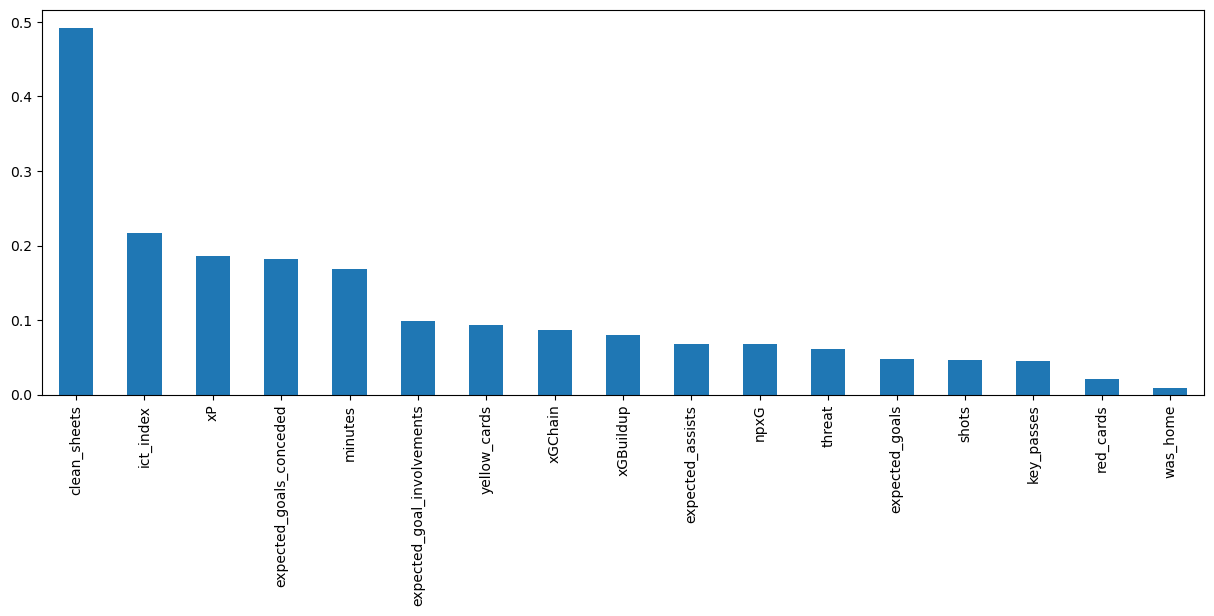

In [21]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

##### Select to 20% perct


In [22]:
from sklearn.feature_selection import SelectPercentile

## Selecting the top 20 percentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=50)
selected_top_columns.fit(k_sel_X_train, def_splits['target_train'])

selected_top_columns.get_support()

array([ True,  True, False, False, False, False, False, False,  True,
        True,  True, False,  True, False,  True,  True, False])

In [23]:
def_20_columns = k_sel_X_train.columns[selected_top_columns.get_support()]

def_20_train = k_sel_X_train[def_20_columns]
def_20_test = k_sel_X_test[def_20_columns]


##### Model (MI)


###### Linear Model


In [24]:

MI_def_lin_reg = Linear_regression(def_20_train, def_20_test,
                               def_splits['target_train'], def_splits['target_test'])

# Store the model evaluation details in a DataFrame
def_evaluation_stats = def_evaluation_stats.assign(MI_def_lin_reg =  [MI_def_lin_reg['train_RMSE'], MI_def_lin_reg['test_RMSE'], MI_def_lin_reg['cv_rmse'], MI_def_lin_reg['R2_train'], MI_def_lin_reg['R2_test']])

def_evaluation_stats

Training set RMSE: 1.1539722490624509
Test set RMSE: 1.1777042694356687
Training set R2: 0.7917733843105238
Test set R2: 0.7808759464612407
count    10.000000
mean      1.156790
std       0.050803
min       1.047932
25%       1.141869
50%       1.154424
75%       1.187484
max       1.231117
dtype: float64


,base_def_lin_reg,base_def_dt_reg,base_def_rf_reg,base_def_xgb_reg,VarT_def_lin_reg,VarT_def_dt_reg,VarT_def_rf_reg,VarT_def_xgb_reg,KBest_def_lin_reg,KBest_def_dt_reg,KBest_def_rf_reg,KBest_def_xgb_reg,MI_def_lin_reg
train_RMSE,1.000358,4.670847e-15,0.679617,0.868038,1.000358,4.666987e-15,0.680037,0.868038,1.003113,8.339827e-15,0.681688,0.870265,1.153972
test_RMSE,0.997658,1.327433e+00,0.910994,0.967450,0.997658,1.346185e+00,0.912053,0.967450,0.997447,1.261953e+00,0.899896,0.967792,1.177704
cv_rmse,1.006002,1.318856e+00,0.985390,0.993612,1.006002,1.345366e+00,0.984808,0.993612,1.007968,1.347806e+00,0.978088,0.995557,1.156790
R2_train,0.843521,1.000000e+00,0.927777,0.882179,0.843521,1.000000e+00,0.927688,0.882179,0.842658,1.000000e+00,0.927336,0.881574,0.791773
R2_test,0.842753,7.216170e-01,0.868886,0.852132,0.842753,7.136961e-01,0.868581,0.852132,0.842820,7.484039e-01,0.872061,0.852027,0.780876


###### DecisionTree Model


In [25]:
MI_def_dt_reg = DecisionTreeRegression(def_20_train, def_20_test,
                               def_splits['target_train'], def_splits['target_test'])

# Store the model evaluation details in a DataFrame
def_evaluation_stats = def_evaluation_stats.assign(MI_def_dt_reg = [MI_def_dt_reg['train_RMSE'], MI_def_dt_reg['test_RMSE'], MI_def_dt_reg['cv_rmse'], MI_def_dt_reg['R2_train'], MI_def_dt_reg['R2_test']])

def_evaluation_stats



Training set RMSE: 9.115615959322934e-15
Test set RMSE: 1.3063200974112883
Training set R2: 1.0
Test set R2: 0.73040193477766
count    10.000000
mean      1.440313
std       0.129974
min       1.203639
25%       1.364381
50%       1.477383
75%       1.530864
max       1.592980
dtype: float64


,base_def_lin_reg,base_def_dt_reg,base_def_rf_reg,base_def_xgb_reg,VarT_def_lin_reg,VarT_def_dt_reg,VarT_def_rf_reg,VarT_def_xgb_reg,KBest_def_lin_reg,KBest_def_dt_reg,KBest_def_rf_reg,KBest_def_xgb_reg,MI_def_lin_reg,MI_def_dt_reg
train_RMSE,1.000358,4.670847e-15,0.679617,0.868038,1.000358,4.666987e-15,0.680037,0.868038,1.003113,8.339827e-15,0.681688,0.870265,1.153972,9.115616e-15
test_RMSE,0.997658,1.327433e+00,0.910994,0.967450,0.997658,1.346185e+00,0.912053,0.967450,0.997447,1.261953e+00,0.899896,0.967792,1.177704,1.306320e+00
cv_rmse,1.006002,1.318856e+00,0.985390,0.993612,1.006002,1.345366e+00,0.984808,0.993612,1.007968,1.347806e+00,0.978088,0.995557,1.156790,1.440313e+00
R2_train,0.843521,1.000000e+00,0.927777,0.882179,0.843521,1.000000e+00,0.927688,0.882179,0.842658,1.000000e+00,0.927336,0.881574,0.791773,1.000000e+00
R2_test,0.842753,7.216170e-01,0.868886,0.852132,0.842753,7.136961e-01,0.868581,0.852132,0.842820,7.484039e-01,0.872061,0.852027,0.780876,7.304019e-01


###### RandomForest Model


In [26]:
hyperparameters = {"criterion": 'friedman_mse', "max_depth": 8, "max_features": 'sqrt', "n_estimators": 20}
MI_def_rf_reg = RandomForestRegression(def_20_train, def_20_test,
                               def_splits['target_train'], def_splits['target_test'], hyperparameters)

# Store the model evaluation details in a DataFrame
def_evaluation_stats = def_evaluation_stats.assign(MI_def_rf_reg = [MI_def_rf_reg['train_RMSE'], MI_def_rf_reg['test_RMSE'], MI_def_rf_reg['cv_rmse'], MI_def_rf_reg['R2_train'], MI_def_rf_reg['R2_test']])

def_evaluation_stats

count    10.000000
mean      1.057820
std       0.052760
min       0.972379
25%       1.035355
50%       1.051715
75%       1.078209
max       1.170202
dtype: float64


,base_def_lin_reg,base_def_dt_reg,base_def_rf_reg,base_def_xgb_reg,VarT_def_lin_reg,VarT_def_dt_reg,VarT_def_rf_reg,VarT_def_xgb_reg,KBest_def_lin_reg,KBest_def_dt_reg,KBest_def_rf_reg,KBest_def_xgb_reg,MI_def_lin_reg,MI_def_dt_reg,MI_def_rf_reg
train_RMSE,1.000358,4.670847e-15,0.679617,0.868038,1.000358,4.666987e-15,0.680037,0.868038,1.003113,8.339827e-15,0.681688,0.870265,1.153972,9.115616e-15,0.752245
test_RMSE,0.997658,1.327433e+00,0.910994,0.967450,0.997658,1.346185e+00,0.912053,0.967450,0.997447,1.261953e+00,0.899896,0.967792,1.177704,1.306320e+00,1.022928
cv_rmse,1.006002,1.318856e+00,0.985390,0.993612,1.006002,1.345366e+00,0.984808,0.993612,1.007968,1.347806e+00,0.978088,0.995557,1.156790,1.440313e+00,1.057820
R2_train,0.843521,1.000000e+00,0.927777,0.882179,0.843521,1.000000e+00,0.927688,0.882179,0.842658,1.000000e+00,0.927336,0.881574,0.791773,1.000000e+00,0.911516
R2_test,0.842753,7.216170e-01,0.868886,0.852132,0.842753,7.136961e-01,0.868581,0.852132,0.842820,7.484039e-01,0.872061,0.852027,0.780876,7.304019e-01,0.834687


###### XgBoost Model


In [27]:
hyperparameters = {'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 150}
MI_def_xgb_reg = XGBoostRegression(k_sel_X_train, k_sel_X_test, def_splits['target_train'], def_splits['target_test'], hyperparameters)

# Store the model evaluation details in a DataFrame
def_evaluation_stats = def_evaluation_stats.assign(MI_def_xgb_reg = [MI_def_xgb_reg['train_RMSE'], MI_def_xgb_reg['test_RMSE'], MI_def_xgb_reg['cv_rmse'], MI_def_xgb_reg['R2_train'], MI_def_xgb_reg['R2_test']])
def_evaluation_stats

,base_def_lin_reg,base_def_dt_reg,base_def_rf_reg,base_def_xgb_reg,VarT_def_lin_reg,VarT_def_dt_reg,VarT_def_rf_reg,VarT_def_xgb_reg,KBest_def_lin_reg,KBest_def_dt_reg,KBest_def_rf_reg,KBest_def_xgb_reg,MI_def_lin_reg,MI_def_dt_reg,MI_def_rf_reg,MI_def_xgb_reg
train_RMSE,1.000358,4.670847e-15,0.679617,0.868038,1.000358,4.666987e-15,0.680037,0.868038,1.003113,8.339827e-15,0.681688,0.870265,1.153972,9.115616e-15,0.752245,0.870265
test_RMSE,0.997658,1.327433e+00,0.910994,0.967450,0.997658,1.346185e+00,0.912053,0.967450,0.997447,1.261953e+00,0.899896,0.967792,1.177704,1.306320e+00,1.022928,0.967792
cv_rmse,1.006002,1.318856e+00,0.985390,0.993612,1.006002,1.345366e+00,0.984808,0.993612,1.007968,1.347806e+00,0.978088,0.995557,1.156790,1.440313e+00,1.057820,0.995557
R2_train,0.843521,1.000000e+00,0.927777,0.882179,0.843521,1.000000e+00,0.927688,0.882179,0.842658,1.000000e+00,0.927336,0.881574,0.791773,1.000000e+00,0.911516,0.881574
R2_test,0.842753,7.216170e-01,0.868886,0.852132,0.842753,7.136961e-01,0.868581,0.852132,0.842820,7.484039e-01,0.872061,0.852027,0.780876,7.304019e-01,0.834687,0.852027


# Best Stats


In [28]:
def_evaluation_stats

,base_def_lin_reg,base_def_dt_reg,base_def_rf_reg,base_def_xgb_reg,VarT_def_lin_reg,VarT_def_dt_reg,VarT_def_rf_reg,VarT_def_xgb_reg,KBest_def_lin_reg,KBest_def_dt_reg,KBest_def_rf_reg,KBest_def_xgb_reg,MI_def_lin_reg,MI_def_dt_reg,MI_def_rf_reg,MI_def_xgb_reg
train_RMSE,1.000358,4.670847e-15,0.679617,0.868038,1.000358,4.666987e-15,0.680037,0.868038,1.003113,8.339827e-15,0.681688,0.870265,1.153972,9.115616e-15,0.752245,0.870265
test_RMSE,0.997658,1.327433e+00,0.910994,0.967450,0.997658,1.346185e+00,0.912053,0.967450,0.997447,1.261953e+00,0.899896,0.967792,1.177704,1.306320e+00,1.022928,0.967792
cv_rmse,1.006002,1.318856e+00,0.985390,0.993612,1.006002,1.345366e+00,0.984808,0.993612,1.007968,1.347806e+00,0.978088,0.995557,1.156790,1.440313e+00,1.057820,0.995557
R2_train,0.843521,1.000000e+00,0.927777,0.882179,0.843521,1.000000e+00,0.927688,0.882179,0.842658,1.000000e+00,0.927336,0.881574,0.791773,1.000000e+00,0.911516,0.881574
R2_test,0.842753,7.216170e-01,0.868886,0.852132,0.842753,7.136961e-01,0.868581,0.852132,0.842820,7.484039e-01,0.872061,0.852027,0.780876,7.304019e-01,0.834687,0.852027


In [29]:
# Defenders
#### Rf Model under the Variance threshold performed better